In [292]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

**Loading the dataset**

In [293]:
jobs_data = pd.read_csv('/content/Jobs_NYC_Postings.csv')

In [294]:
jobs_data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,644978,DEPARTMENT OF TRANSPORTATION,External,3,Investigator,INVESTIGATOR,Competitive-1,31105,00,Building Operations & Maintenance Public Safet...,...,IN ORDER TO BE CONSIDERED FOR THIS POSITION CA...,All resumes are to be submitted electronically...,NaN,NaN,NaN,New York City residency is generally required ...,08/06/2024,NaN,08/15/2024,10/29/2024
1,650571,DEPT OF DESIGN & CONSTRUCTION,External,1,College Aide,COLLEGE AIDE (ALL CITY DEPTS),Non-Competitive-5,10209,01,Administration & Human Resources,...,NaN,NaN,NaN,NaN,NaN,New York City residency is generally required ...,09/18/2024,NaN,09/18/2024,10/29/2024
2,590901,DEPARTMENT OF TRANSPORTATION,External,1,Middle and High School Team Leader,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,"Public Safety, Inspections, & Enforcement",...,The City of New York is an inclusive equal opp...,All resumes are to be submitted electronically...,35hrs,"59 Maiden Lane, 34th Floor, New York, NY 10038",NaN,New York City residency is generally required ...,06/28/2023,NaN,07/06/2023,10/29/2024
3,647962,HRA/DEPT OF SOCIAL SERVICES,Internal,1,PROJECT SPECIALIST,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,13632,03,"Technology, Data & Innovation Social Services",...,"In addition, the Human Resources Administratio...",Click Apply Now Button,NaN,NaN,NaN,New York City Residency is not required for th...,08/21/2024,NaN,08/22/2024,10/29/2024
4,629110,DEPARTMENT OF TRANSPORTATION,External,1,BOB- Site Safety Officer,ADMINISTRATIVE TRANSPORTATION,Competitive-1,10061,M2,"Public Safety, Inspections, & Enforcement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,35 Hours,55 Water St Ny Ny,NaN,New York City residency is generally required ...,03/07/2024,NaN,03/26/2024,10/29/2024


In [295]:
jobs_data.shape

(5459, 30)

In [296]:
jobs_data.columns.values

array(['Job ID', 'Agency', 'Posting Type', '# Of Positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Work Location 1', 'Recruitment Contact', 'Residency Requirement',
       'Posting Date', 'Post Until', 'Posting Updated', 'Process Date'],
      dtype=object)

In [297]:
jobs_data.dtypes

,0
Job ID,int64
Agency,object
Posting Type,object
# Of Positions,int64
Business Title,object
Civil Service Title,object
Title Classification,object
Title Code No,object
Level,object
Job Category,object


In [298]:
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5459 entries, 0 to 5458
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5459 non-null   int64  
 1   Agency                         5459 non-null   object 
 2   Posting Type                   5459 non-null   object 
 3   # Of Positions                 5459 non-null   int64  
 4   Business Title                 5459 non-null   object 
 5   Civil Service Title            5459 non-null   object 
 6   Title Classification           5459 non-null   object 
 7   Title Code No                  5459 non-null   object 
 8   Level                          5459 non-null   object 
 9   Job Category                   5459 non-null   object 
 10  Full-Time/Part-Time indicator  5459 non-null   object 
 11  Career Level                   5459 non-null   object 
 12  Salary Range From              5459 non-null   f

In [299]:
jobs_data1 = jobs_data.copy()

# Data Cleaning

In [300]:
# Check for duplicate rows
duplicate_rows_df = jobs_data1[jobs_data1.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (23, 30)


In [301]:
# Remove duplicate rows
jobs_data1 = jobs_data.drop_duplicates()

In [302]:
# Drop irrelevant columns
columns_to_drop = ['Recruitment Contact', 'Posting Type', 'Post Until', 'Hours/Shift',
                   'Work Location 1', 'Additional Information', 'To Apply', 'Job ID',
                   'Title Code No', 'Division/Work Unit', 'Job Description', 'Residency Requirement','Civil Service Title', 'Business Title', 'Title Classification']
jobs_data1 = jobs_data1.drop(columns=columns_to_drop)

In [303]:
print(jobs_data1.isnull().sum())

Agency                              0
# Of Positions                      0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator       0
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Minimum Qual Requirements          50
Preferred Skills                 1855
Posting Date                        0
Posting Updated                     0
Process Date                        0
dtype: int64


In [304]:
# Fill missing values in 'Minimum Qual Requirements' and 'Preferred Skills' columns
jobs_data1['Minimum Qual Requirements'] = jobs_data1['Minimum Qual Requirements'].fillna('')
jobs_data1['Preferred Skills'] = jobs_data1['Preferred Skills'].fillna('')

# Pre-processing

In [305]:
# Standardize salary information to annual basis
def convert_to_annual(row):
    if row['Salary Frequency'] == 'Hourly':
        row['Salary Range From'] *= 2080  # Hourly to annual
        row['Salary Range To'] *= 2080
    elif row['Salary Frequency'] == 'Monthly':
        row['Salary Range From'] *= 12    # Monthly to annual
        row['Salary Range To'] *= 12
    return row

In [306]:
# Apply conversion function to standardize salary
jobs_data1 = jobs_data1.apply(convert_to_annual, axis=1)

In [307]:
# Drop part-time job postings for focused full-time analysis
jobs_data1 = jobs_data1[jobs_data1['Full-Time/Part-Time indicator'] == 'F']

In [308]:
# Filter out rows where Career Level is "Student"
jobs_data1 = jobs_data1[jobs_data1['Career Level'] != 'Student']

In [309]:
# Remove outliers in 'Salary Range From' and 'Salary Range To' using Z-score
z_scores_from = np.abs(stats.zscore(jobs_data1['Salary Range From']))
z_scores_to = np.abs(stats.zscore(jobs_data1['Salary Range To']))
jobs_data1 = jobs_data1[(z_scores_from < 3) & (z_scores_to < 3)]

# Feature Engineering

In [310]:
# Convert 'Posting Date' to datetime and extract year and month
jobs_data1['Posting Date'] = pd.to_datetime(jobs_data1['Posting Date'], errors='coerce')
jobs_data1['Posting Year'] = jobs_data1['Posting Date'].dt.year
jobs_data1['Posting Month'] = jobs_data1['Posting Date'].dt.month

In [311]:
# Create salary bins for categorization
jobs_data1['Salary Bin'] = pd.cut(jobs_data1['Salary Range From'],
                                  bins=[0, 50000, 100000, 150000, 300000],
                                  labels=['Low', 'Medium', 'High', 'Very High'])

In [312]:
# Map career levels to numeric values for correlation analysis
career_level_mapping = {'Entry-Level': 1, 'Experienced (non-manager)': 2, 'Manager': 3, 'Executive': 4}
jobs_data1['Career Level Numeric'] = jobs_data1['Career Level'].map(career_level_mapping)

In [313]:
 #simplify the categorical data by grouping similar job categories that start with the same word
 #Create a helper column named 'Category Key' that contains only the first word of each job category
jobs_data1['Category Key'] = jobs_data1['Job Category'].apply(lambda x: x.split()[0])

def get_shortest_category(group):
    return min(group, key=lambda x: len(x))

shortest_category = jobs_data1.groupby('Category Key')['Job Category'].apply(get_shortest_category).to_dict()
jobs_data1['Job Category'] = jobs_data1['Category Key'].map(shortest_category)
jobs_data1.drop(columns=['Category Key'], inplace=True)


# Data Visualization

##Univariate Analysis

**Career Level Distribution**

The Pie chart shows the proportion of postings by career level

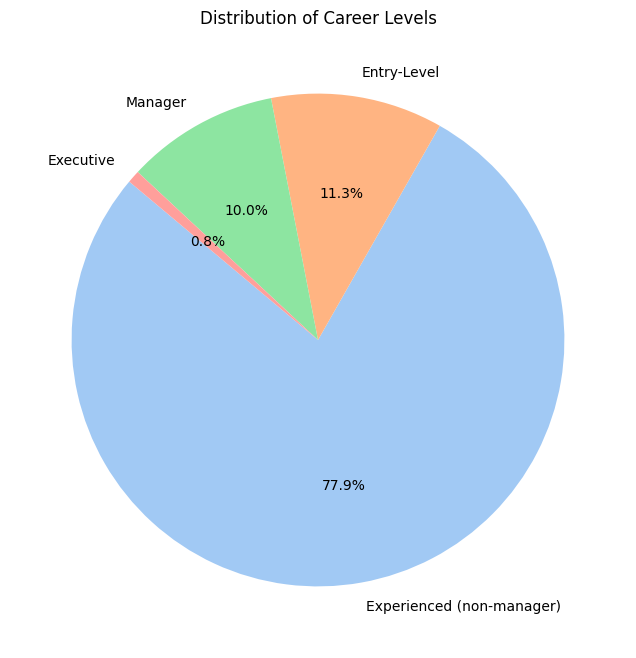

In [314]:
plt.figure(figsize=(8, 8))
career_levels = jobs_data1['Career Level'].value_counts()
plt.pie(career_levels, labels=career_levels.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Career Levels');

**Top Job Categories**

In [315]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

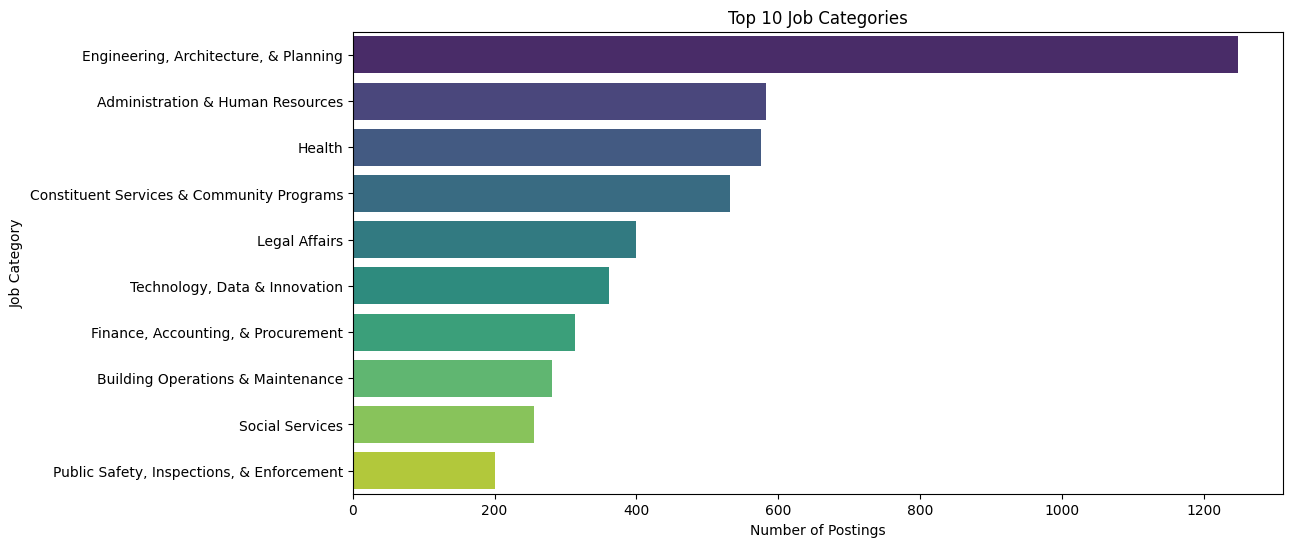

In [316]:
plt.figure(figsize=(12, 6))
top_job_categories = jobs_data1['Job Category'].value_counts().nlargest(10)
sns.barplot(x=top_job_categories.values, y=top_job_categories.index, palette="viridis")

plt.title('Top 10 Job Categories')
plt.xlabel('Number of Postings')
plt.ylabel('Job Category');

**Job Postings by Agency**

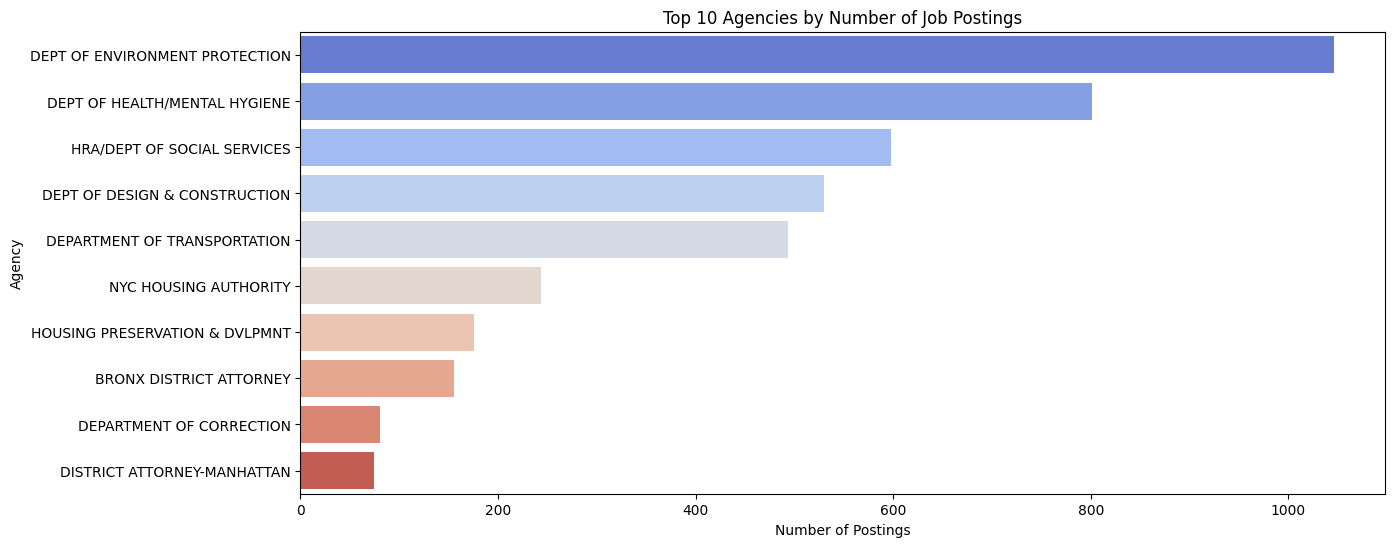

In [317]:
plt.figure(figsize=(14, 6))
top_agencies = jobs_data1['Agency'].value_counts().nlargest(10)
sns.barplot(x=top_agencies.values, y=top_agencies.index, palette="coolwarm")
plt.title('Top 10 Agencies by Number of Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Agency');

**Salary Bin Distribution**

Display the frequency of different salary ranges (Low, Medium, High, Very High).

<ipython-input-318-bd1963181ba2>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(jobs_data1['Salary Bin'], kde=True, palette="coolwarm")


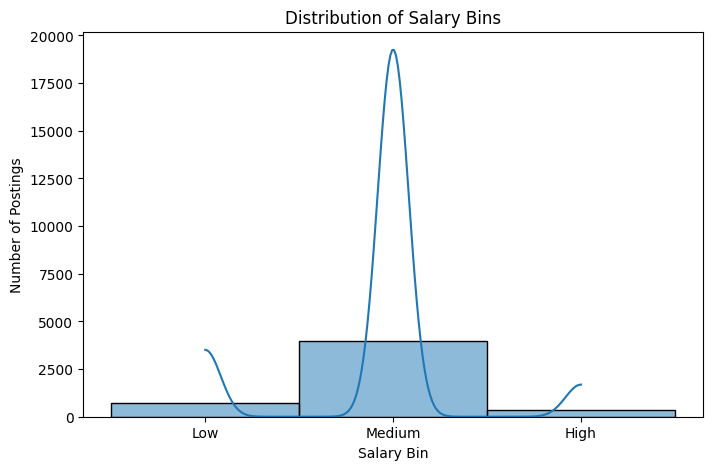

In [318]:
plt.figure(figsize=(8, 5))
sns.histplot(jobs_data1['Salary Bin'], kde=True, palette="coolwarm")
plt.title('Distribution of Salary Bins')
plt.xlabel('Salary Bin')
plt.ylabel('Number of Postings');

**Number of Job Posting based on Location**

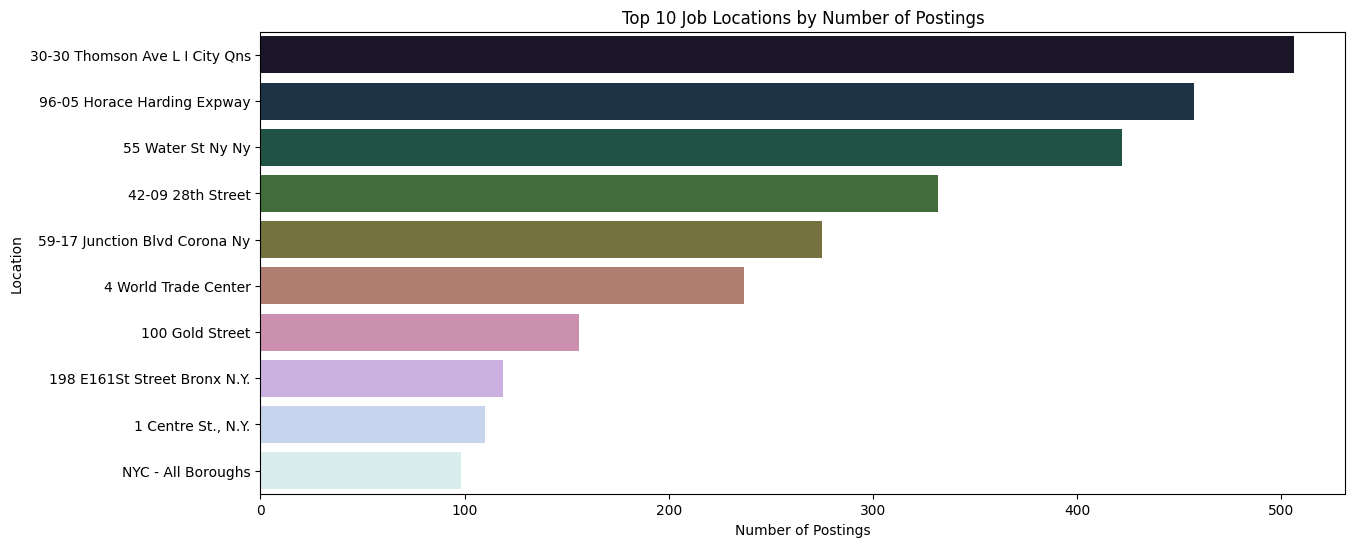

In [319]:
plt.figure(figsize=(14, 6))
top_locations = jobs_data1['Work Location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="cubehelix")
plt.title('Top 10 Job Locations by Number of Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Location');

##Bivariate Analysis

**Starting Salary by Career Level**

Show differences in starting salaries across career levels.

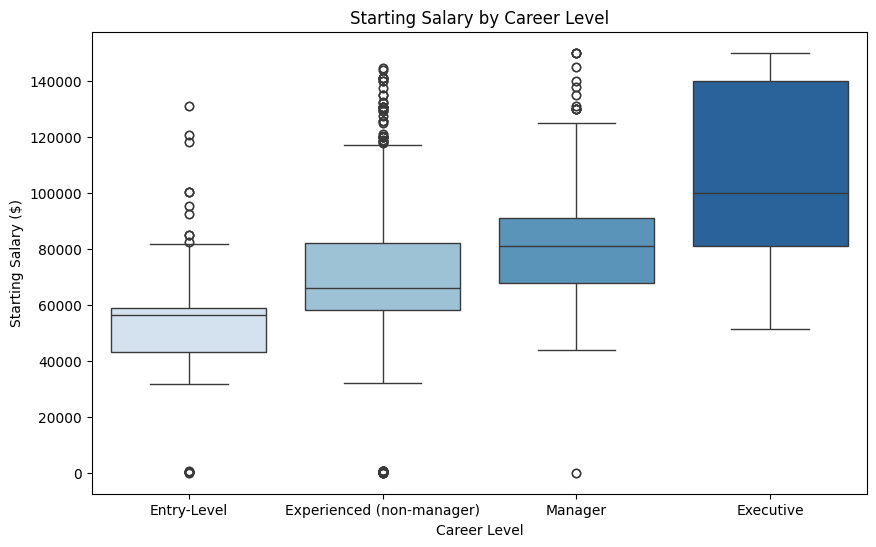

In [320]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Career Level', y='Salary Range From', data=jobs_data1, palette="Blues")
plt.title('Starting Salary by Career Level')
plt.xlabel('Career Level')
plt.ylabel('Starting Salary ($)');

**Maximum Salary by Career Level**

Similar to above but for maximum salary, using a violin plot for better distribution visualization.

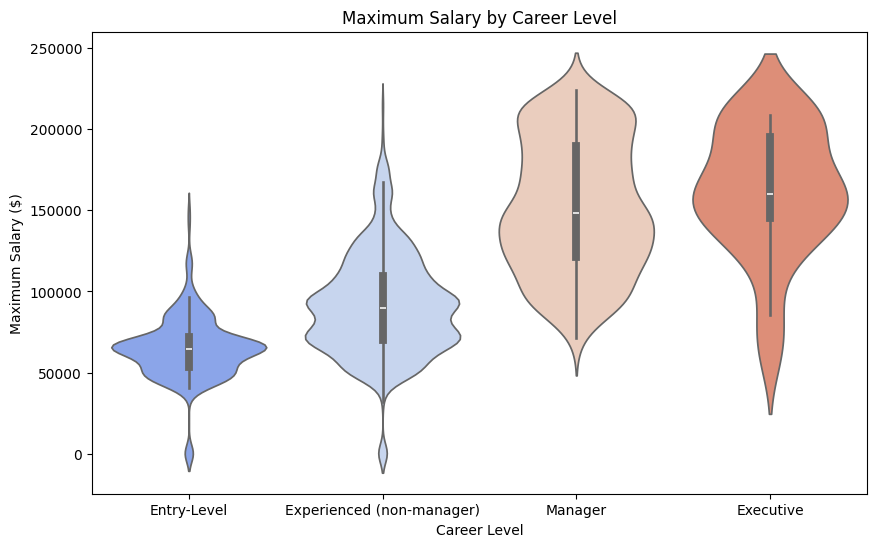

In [321]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Career Level', y='Salary Range To', data=jobs_data1, palette="coolwarm")
plt.title('Maximum Salary by Career Level')
plt.xlabel('Career Level')
plt.ylabel('Maximum Salary ($)');

**Starting Salary by Job Category**

Show the distribution of starting salaries across job categories focusing on the top 10-15 categories by median starting salary to give a clear overview of the best-paying fields.

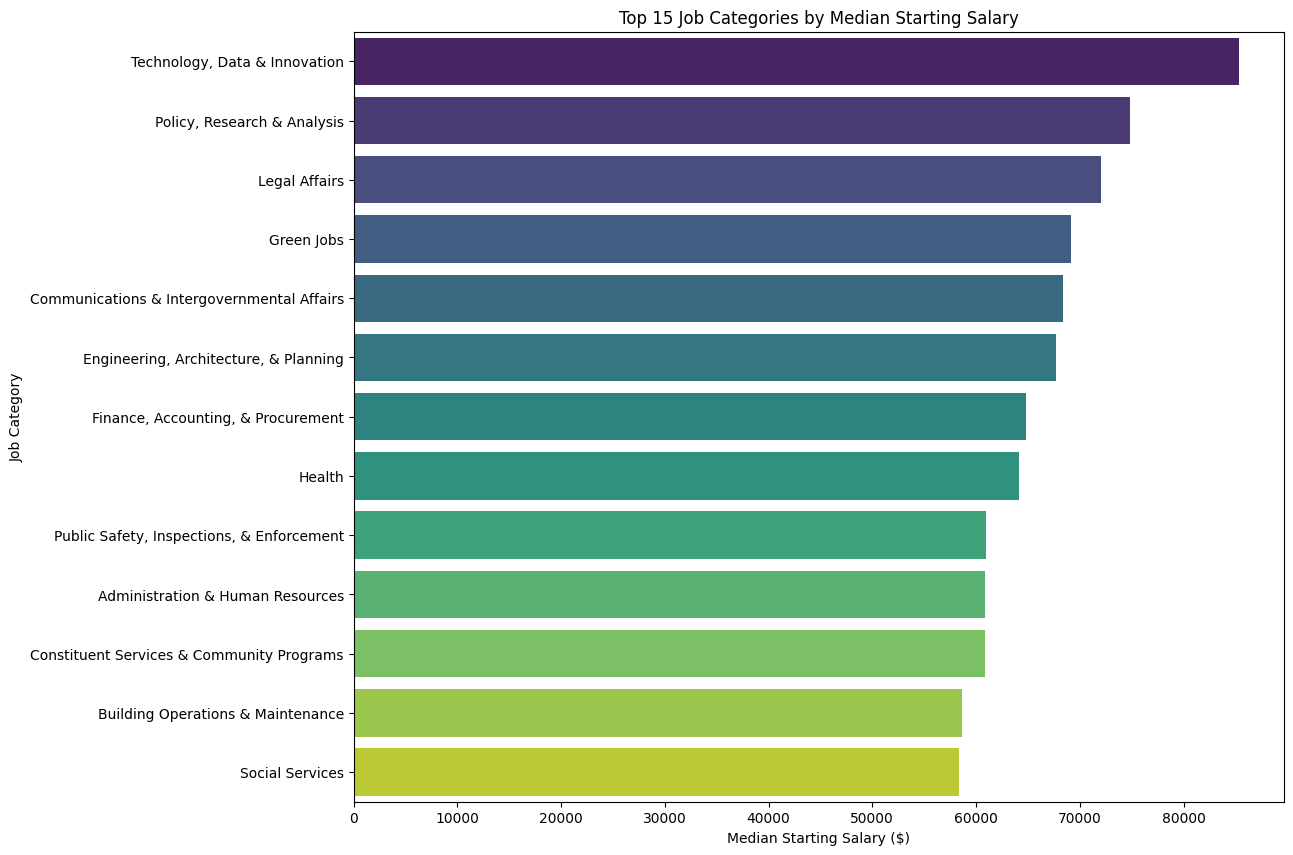

In [322]:
# Calculate median starting salary for each job category
median_salaries = jobs_data1.groupby('Job Category')['Salary Range From'].median().sort_values(ascending=False)

# Select the top 15 categories by median salary
top_categories = median_salaries.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title('Top 15 Job Categories by Median Starting Salary')
plt.xlabel('Median Starting Salary ($)')
plt.ylabel('Job Category');

##Multivariate Analysis

**Correlation Heatmap**

Shows correlations between Career Level Numeric, Salary Range From, and Salary Range To.

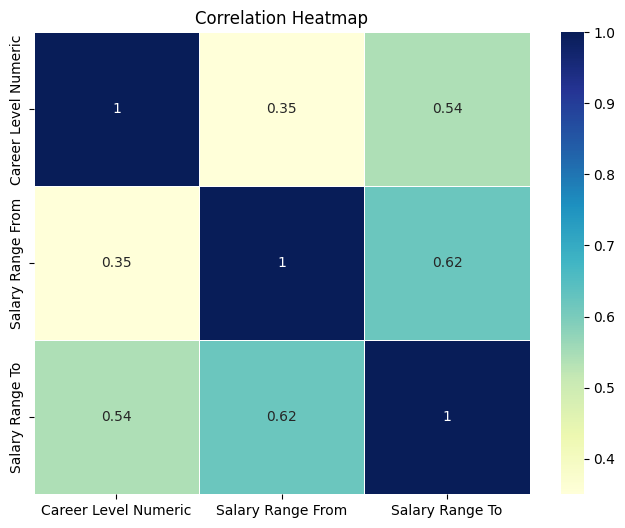

In [323]:
plt.figure(figsize=(8, 6))
sns.heatmap(jobs_data1[['Career Level Numeric', 'Salary Range From', 'Salary Range To']].corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap');

**Relationship Between Salary, Number of Positions, and Job Categories**

Scatter plot with top 10 job categories

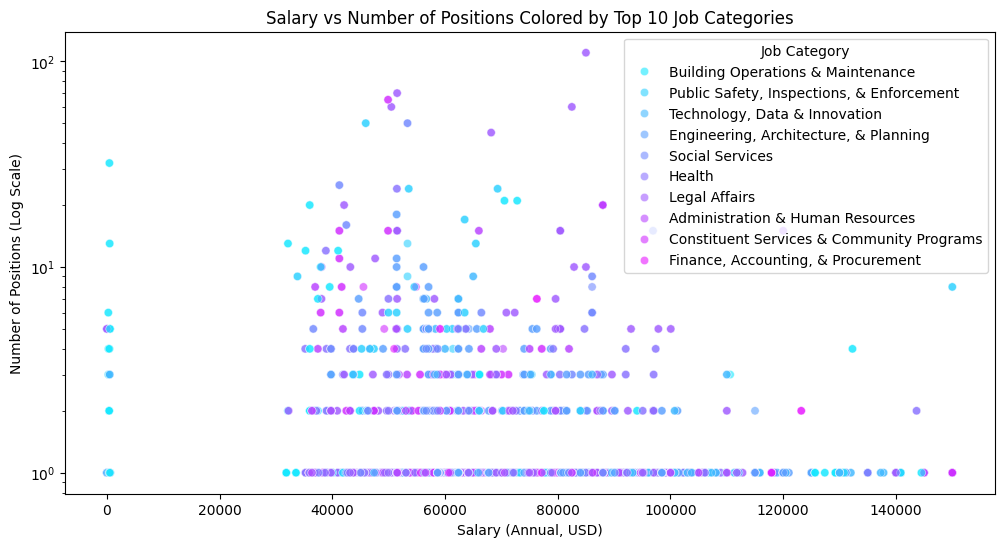

In [324]:
top_categories = jobs_data1['Job Category'].value_counts().nlargest(10).index
filtered_data = jobs_data1[jobs_data1['Job Category'].isin(top_categories)]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Salary Range From', y='# Of Positions', data=filtered_data, alpha=0.6, hue='Job Category', palette='cool')
plt.yscale('log')
plt.title('Salary vs Number of Positions Colored by Top 10 Job Categories')
plt.xlabel('Salary (Annual, USD)')
plt.ylabel('Number of Positions (Log Scale)');

##Time Series Analysis

**Job Postings by Month**

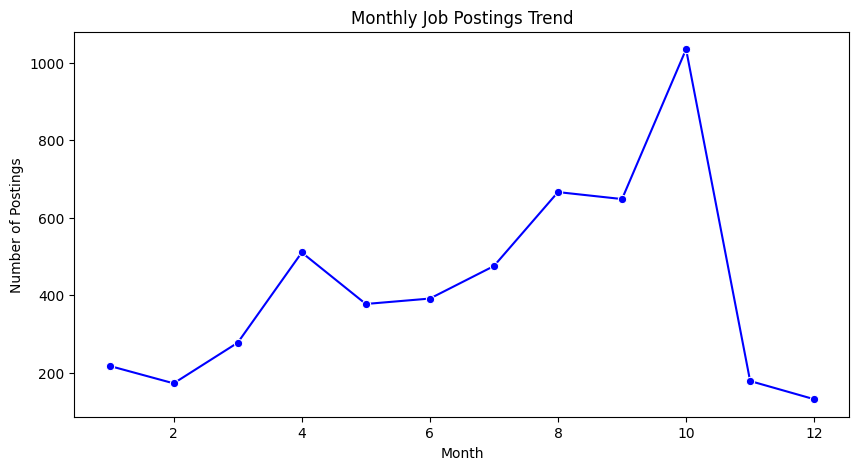

In [325]:
monthly_counts = jobs_data1['Posting Month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker="o", color="b")
plt.title('Monthly Job Postings Trend')
plt.xlabel('Month')
plt.ylabel('Number of Postings');

**Job Postings By Year**

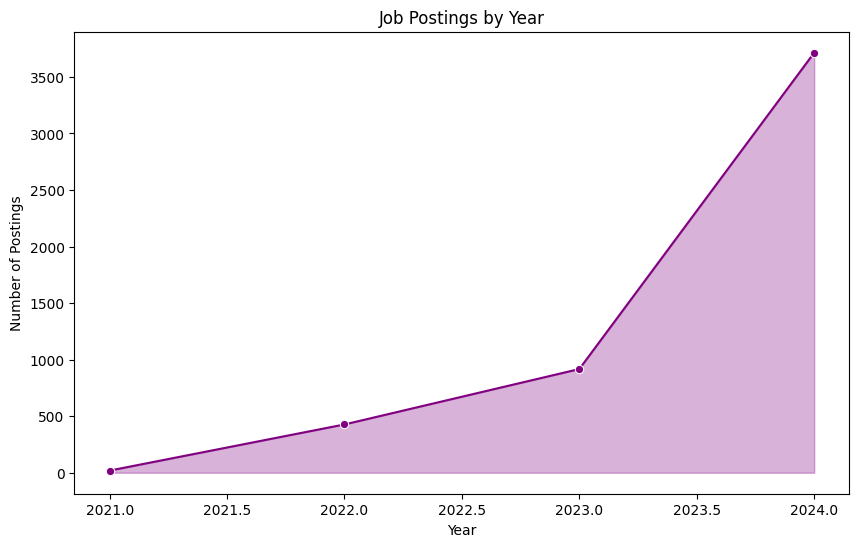

In [326]:
yearly_counts = jobs_data1['Posting Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", color="purple")
plt.fill_between(yearly_counts.index, yearly_counts.values, color="purple", alpha=0.3)
plt.title('Job Postings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Postings');

## Text Anaysis

**Top Requirements in Minimum Qualifications**

Two word phrases

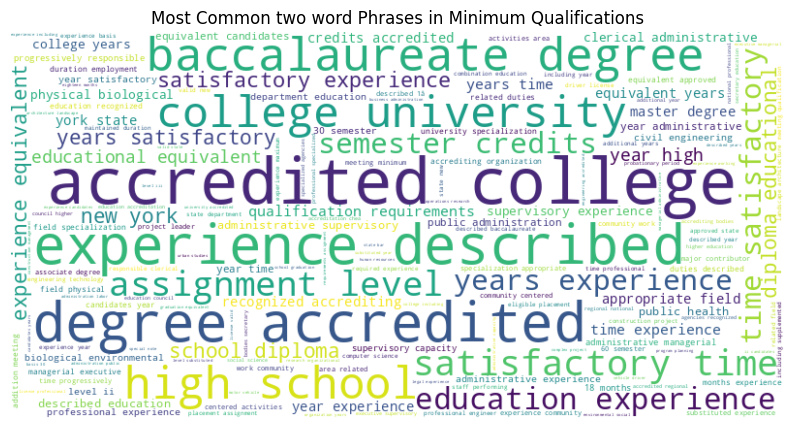

In [ ]:
# Concatenating all text in the "Minimum Qual Requirements" column
text = " ".join(jobs_data1['Minimum Qual Requirements'])

# Using CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform([text])
bigrams = vectorizer.get_feature_names_out()

# Creating a dictionary of bigrams and their counts
bigram_counts = X.toarray().flatten()
bigram_dict = dict(zip(bigrams, bigram_counts))

# Generating the word cloud from bigrams
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common two word Phrases in Minimum Qualifications");


Eight Word Phrases

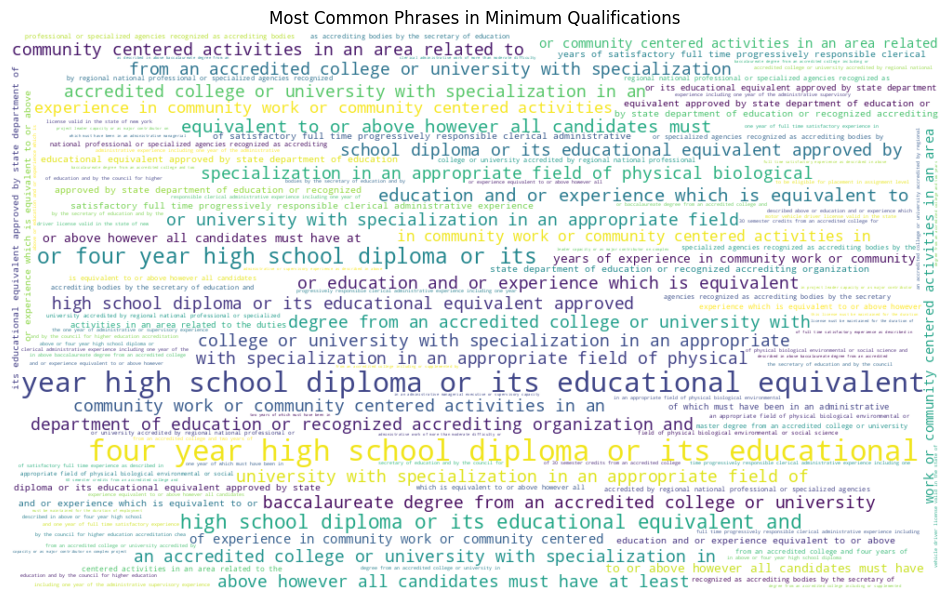

In [ ]:
text = " ".join(jobs_data1['Minimum Qual Requirements'].fillna(""))

vectorizer = CountVectorizer(ngram_range=(8, 8))
X = vectorizer.fit_transform([text])
trigrams = vectorizer.get_feature_names_out()

trigram_counts = X.toarray().flatten()
trigram_dict = dict(zip(trigrams, trigram_counts))

wordcloud = WordCloud(width=1000, height=600, background_color='white',
                      colormap='viridis', prefer_horizontal=0.9).generate_from_frequencies(trigram_dict)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Phrases in Minimum Qualifications");

**Top Preferred Skills**

Visualizing the most frequent phrases in the Preferred Skills column.

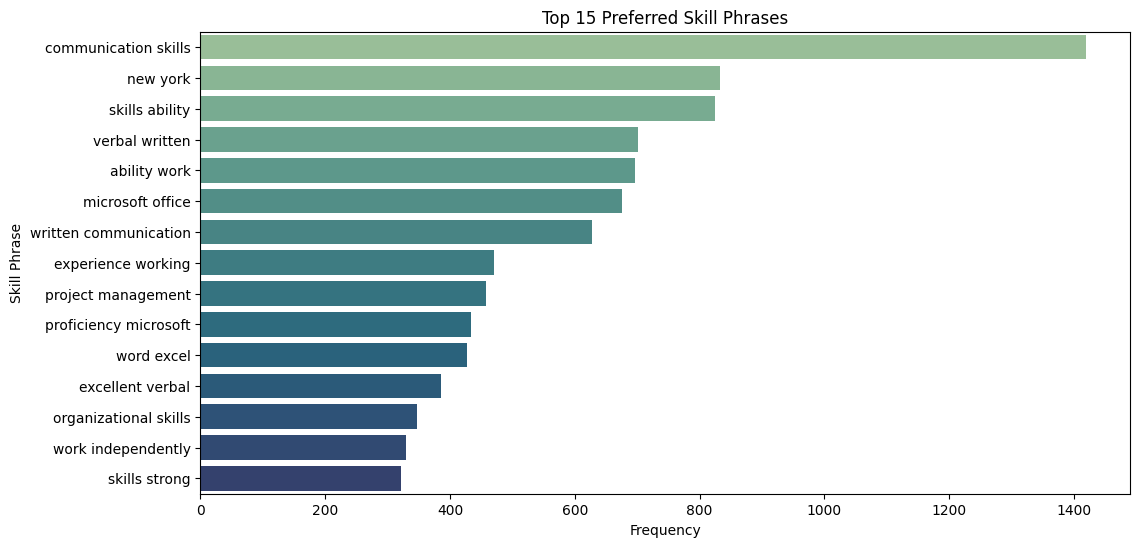

In [329]:
pref_skill_text = jobs_data1['Preferred Skills']

# Setting up CountVectorizer to extract bigrams
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=15)
skill_counts = vectorizer.fit_transform(pref_skill_text)

# Summing the occurrences of each bigram and sorting them by frequency
skill_freq = pd.DataFrame(skill_counts.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=skill_freq.values, y=skill_freq.index, palette="crest")
plt.title('Top 15 Preferred Skill Phrases')
plt.xlabel('Frequency')
plt.ylabel('Skill Phrase');